# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 16:16:12--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  27.7MB/s   in 0.2s   

2016-10-24 16:16:12 (27.7 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

In [2]:
!mv abq-food-inspections-fy2010.csv abqdata.csv
!csvcut -n abqdata.csv
!cat abqdata.csv | wc -l

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO
17557


In [3]:
!head -20 abqdata.csv | csvcut -c8,9,10,11,12,13 | csvlook
!head -20 abqdata.csv | csvcut -c14,15,16,17,18 | csvlook
!head -20 abqdata.csv | csvcut -c19,20,21,22,23 | csvlook
!head -20 abqdata.csv | csvcut -c24,25,26,27 | csvlook

|--------------------------+--------------------+---------------+-------------+-------------+-------------------|
|  OWNER_NAME              | NATURE_OF_BUSINESS | STREET_NUMBER | STREET_NAME | STREET_TYPE | POST_DIRECTIONAL  |
|--------------------------+--------------------+---------------+-------------+-------------+-------------------|
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  2000 VIETMAN RESTAURANT | RESTAURANT         | 601           | SAN MATEO   | BLVD    

In [4]:
!csvstat abqdata.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ECHO INC:	68
		ISLETA AMPHITHEATER:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		80949:	68
		32817:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: 87, NM
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

What do all the columns mean?
1: FACILITY_NAME: Name of the facility where the food inspection occurred
2: FACILITY_KEY: The unique identifier (key) of the facility where the food inspection occurred
3: SITE_ADDRESS: Street address of the facility where the food inspection occurred
4: CITY: City of the facility where the food inspection occurred
5: STATE: State of the facility where the food inspection occurred
6: ZIP: Zip of the facility where the food inspection occurred
7: OWNER_KEY: The unique identifier (key) of the Owner of the facility where the food inspection occurred at the time of the inspection
8: OWNER_NAME: Name of the Owner of the facility where the food inspection occurred at the time of the inspection
9: NATURE_OF_BUSINESS: The type of business, originally for internal use only, provides information about the business. This information is not on the federal tax form
10: STREET_NUMBER: Street number of the facility where the food inspection occurred
11: STREET_NAME: Street name of the facility where the food inspection occurred
12: STREET_TYPE: Street type of the facility where the food inspection occurred
13: POST_DIRECTIONAL: Postal direction of the facility where the food inspection occurred
14: PHONE: Phone number of the facility where the food inspection occurred
15: PROGRAM_CATEGORY: Id that indicates the type of facility permit the food inspection was performed
16: PROGRAM_CATEGORY_DESCRIPTION: Descript of the id that indicates the type of facility
17: INSPECTION_DATE: Date the food inspection occurred
18: INSPECTION_TYPE: Code for type of the food inspection
19: INSPECTION_DESC: Description of the food inspection
20: SERIAL_NUM: Unique ID for the food inspection daily activity
21: ACTION_CODE: Code of the action taken
22: ACTION_DESC: Description of the action taken
23: RESULT_CODE: Code of the result of the food inspection
24: RESULT_DESC: Description of the result of the food inspection
25: VIOLATION_CODE: The code for the violation
26: VIOLATION_DESC: Description of the violation that was found
27: INSPECTION_MEMO: Notes from the inspection made by the inspector

Are there null values?
The null values appear on the following variables: SITE_ADDRESS, NATURE_OF_BUSINESS, STREET_NUMBER, STREET_NAME, STREET_TYPE, POST_DIRECTIONAL, PHONE, PROGRAM_CATEGORY_DESCRIPTION, INSPECTION_TYPE, VIOLATION_CODE, VIOLATION_DESC, INSPECTION_MEMO
#Which columns interest you the most?
FACILITY_NAME NATURE_OF_BUSINESS INSPECTION_DESC ACTION_DESC RESULT_DESC VIOLATION_DESC

Which columns present some complications or questions you would like to ask?
what are the 5 most common outcomes (RESULT_DESC variable) in the routine food inspections ?

In [5]:
!csvcut -c1,9,19,22,24,26 abcdata.csv | csvgrep -c3 -m "ROUTINE FOOD INSPECTION" | csvcut -c5 | sort | uniq -c | sort -rn | head -5

[Errno 2] No such file or directory: 'abcdata.csv'




## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [8]:
!createdb -U dbuser exer4

createdb: database creation failed: ERROR:  database "exer4" already exists


In [9]:
%sql postgresql://dbuser@localhost:5432/exer4

'Connected: dbuser@exer4'

In [10]:
!shuf -n 10000 abqdata.csv | csvstat

  1. PER EHSII SHANNON BLUEEYES FA OOB 8/31/13 BASKIN ROBBINS
	<class 'str'>
	Nulls: False
	Unique values: 2479
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	92
		ISOTOPES PARK - OVATIONS:	48
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	47
		ECHO INC:	43
		OOB CALIFORNIA DEL NORTE ICE CREAM LLC:	41
	Max length: 77
  2. 63600
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 94931
	Sum: 467675389
	Mean: 46772.21612161216
	Median: 50552
	Standard Deviation: 32551.882379890903
	Unique values: 2678
	5 most frequent values:
		46323:	48
		65863:	47
		80949:	43
		64527:	41
		91821:	39
  3. 2201 CENTRAL BLVD NW 
	<class 'str'>
	Nulls: True
	Unique values: 2354
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	49
		8601 CENTRAL AV NE:	48
		644 OLD COORS BLVD SW:	47
		2200 SUNPORT BLVD SE:	45
		300 MENAUL NW:	43
	Max length: 35
  4. ALBUQUERQUE
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. NM
	<class 'str'>
	Nulls: False
	Values: NM, 87
  6. 87104
	<class 'str'>
	Nul

In [11]:
%%sql
DROP TABLE IF EXISTS abq;
CREATE TABLE abq (
    FACILITY_NAME VARCHAR(77),
    FACILITY_KEY INTEGER,
    SITE_ADDRESS VARCHAR(35),
    CITY VARCHAR(11),
    STATE VARCHAR(2),
    ZIP VARCHAR(10),
    OWNER_KEY INTEGER,
    OWNER_NAME VARCHAR(82),
    NATURE_OF_BUSINESS VARCHAR(25),
    STREET_NUMBER VARCHAR(7),
    STREET_NAME VARCHAR(24),
    STREET_TYPE VARCHAR(4),
    POST_DIRECTIONAL VARCHAR(2),
    PHONE VARCHAR(15),
    PROGRAM_CATEGORY VARCHAR(4),
    PROGRAM_CATEGORY_DESCRIPTION VARCHAR(40),
    INSPECTION_DATE TIMESTAMP, 
    INSPECTION_TYPE VARCHAR(40),
    INSPECTION_DESC VARCHAR(32),
    SERIAL_NUM VARCHAR(9),
    ACTION_CODE VARCHAR(2),
    ACTION_DESC VARCHAR(50),
    RESULT_CODE VARCHAR(2),
    RESULT_DESC VARCHAR(37),
    VIOLATION_CODE VARCHAR(10),
    VIOLATION_DESC VARCHAR(50),
    INSPECTION_MEMO VARCHAR(40)
    )

Done.
Done.


[]

In [12]:
!pwd

/home/jovyan/work


In [13]:
%%sql
COPY abq FROM '/home/jovyan/work/abqdata.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [14]:
%%sql
SELECT COUNT(*) FROM abq;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

what the most common type of inspection was based on the ABQ data?

In [15]:
%%sql
SELECT inspection_desc, COUNT(*) AS count
FROM abq
GROUP BY inspection_desc
ORDER BY count DESC

15 rows affected.


inspection_desc,count
ROUTINE FOOD INSPECTION,12439
EMERGENCY RESPONSE,1987
New Business Inspection,1005
PRE-OPENING FOOD INSPECTION,743
ADDITIONAL SERVICE PROVIDED,439
MOBILE UNIT FOOD INSPECTION,377
PHONE CALL,247
FOOD FOLLOW-UP INSPECTION,143
FOLLOW-UP DOCUMENTATION RECEIVED,75
MANAGERIAL ASSISTANCE,54


what the most common outcome was from the inspection of the routine food inspections?

In [16]:
%%sql
SELECT violation_desc, COUNT(*) AS count
FROM abq
WHERE inspection_desc IN (
    SELECT inspection_desc
    FROM abq
    GROUP BY inspection_desc
    ORDER BY COUNT(*) DESC
    LIMIT 1)
GROUP BY violation_desc
ORDER BY count DESC
LIMIT 15;

15 rows affected.


violation_desc,count
Additional Comments,5052
No Violations Found,3048
Plumbing: Improperly installed/maintained/supplied,445
Non-Food contact surfaces,407
Improper sanitizing,398
"Floors, Walls, Ceilings",373
Food unprotected,370
Food contact surfaces,230
Cold Holding,178
"Thermometers not provided, not accurate/consp",154


<Container object of 15 artists>

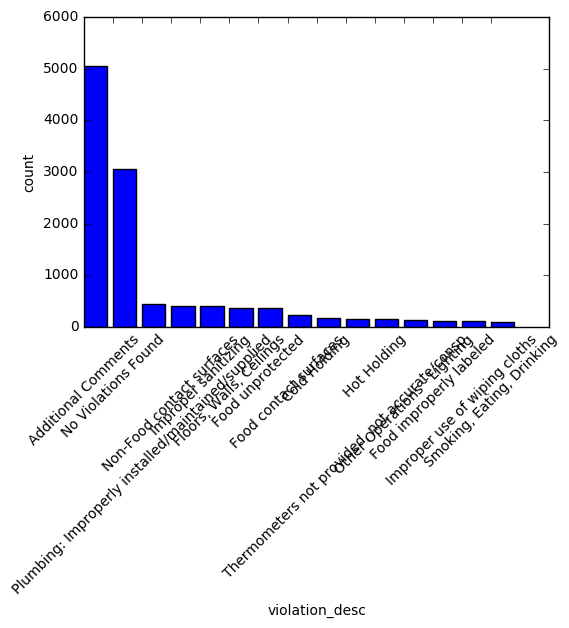

In [17]:
%matplotlib inline
result=_
result.bar()

Is there any further information provided by the additional comments? 

In [18]:
%%sql
SELECT inspection_desc, violation_desc, inspection_memo
FROM abq
WHERE inspection_desc = 'ROUTINE FOOD INSPECTION' AND violation_desc = 'Additional Comments'
LIMIT 20;

20 rows affected.


inspection_desc,violation_desc,inspection_memo
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None
ROUTINE FOOD INSPECTION,Additional Comments,None


Can I find something interesting from the result description?

In [19]:
%%sql
SELECT inspection_desc, violation_desc, result_desc
FROM abq
WHERE inspection_desc = 'ROUTINE FOOD INSPECTION' AND violation_desc = 'Additional Comments'
LIMIT 25;

25 rows affected.


inspection_desc,violation_desc,result_desc
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE
ROUTINE FOOD INSPECTION,Additional Comments,IN COMPLIANCE


## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

Create a new table 

In [20]:
%%sql
SELECT COUNT(*),'program_category' as attribute_name
FROM (SELECT DISTINCT program_category
     FROM abq)table1
UNION
SELECT COUNT(*),'program_category_description' as attribute_name
FROM (SELECT DISTINCT program_category_description
     FROM abq)table2

2 rows affected.


count,attribute_name
25,program_category
25,program_category_description


In [21]:
%%sql
SELECT DISTINCT PROGRAM_CATEGORY  || ' ' || PROGRAM_CATEGORY_DESCRIPTION AS PROGRAM_CATEGORY_DESCRIPTION, PROGRAM_CATEGORY, PROGRAM_CATEGORY_DESCRIPTION
FROM abq;

25 rows affected.


program_category_description,program_category,program_category_description_1
0605 Seasonal Location -Food Service Permit,0605,Seasonal Location -Food Service Permit
0404 Institutional Kitchen,0404,Institutional Kitchen
None,0411,None
1001 Mobile Pre-Packaged,1001,Mobile Pre-Packaged
0607 Retail - Self Service & Prepackage Foods,0607,Retail - Self Service & Prepackage Foods
0406 Food Service Establishment,0406,Food Service Establishment
0407 Limited Menu,0407,Limited Menu
0602 Meat Market,0602,Meat Market
0408 School,0408,School
0609 Retail - Meat/Seafood,0609,Retail - Meat/Seafood


So, there is a one-to-one relationship between program_category and program_category_description.

In [22]:
%%sql
DROP TABLE IF EXISTS program_category;
CREATE TABLE program_category (
    program_category VARCHAR(4),
    program_category_description VARCHAR(40),
    PRIMARY KEY (program_category)
)

Done.
Done.


[]

In [23]:
%%sql
INSERT INTO program_category (program_category, program_category_description)
SELECT DISTINCT program_category, program_category_description
FROM abq

25 rows affected.


[]

In [24]:
%%sql
ALTER TABLE abq
DROP COLUMN program_category_description 

Done.


[]

In [25]:
%%sql
ALTER TABLE abq
ADD CONSTRAINT FK_program_category FOREIGN KEY (program_category)
REFERENCES program_category(program_category) ON DELETE NO ACTION

Done.


[]

In [26]:
%%sql
SELECT COUNT(*),'result_code' as attribute_name
FROM (SELECT DISTINCT result_code
     FROM abq)table1
UNION
SELECT COUNT(*),'result_desc' as attribute_name
FROM (SELECT DISTINCT result_desc
     FROM abq)table2

2 rows affected.


count,attribute_name
19,result_code
19,result_desc


In [27]:
%%sql
SELECT DISTINCT RESULT_CODE  || ' ' || RESULT_DESC AS CODE_RESULT, RESULT_CODE, RESULT_DESC
FROM abq
LIMIT 5;

5 rows affected.


code_result,result_code,result_desc
22 OUT OF BUSINESS,22,OUT OF BUSINESS
11 FACILITY CLOSED AT TIME OF INSPECTION,11,FACILITY CLOSED AT TIME OF INSPECTION
18 TRAINING RECEIVED,18,TRAINING RECEIVED
06 UPGRADE,06,UPGRADE
00 NOT APPLICABLE,00,NOT APPLICABLE


There is a one-to-one relationship between result_code and result_desc

In [28]:
%%sql
DROP TABLE IF EXISTS result;
CREATE TABLE result (
    result_code VARCHAR(2),
    result_desc VARCHAR(37),
    PRIMARY KEY (result_code)
)

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO result (result_code, result_desc)
SELECT DISTINCT result_code, result_desc
FROM abq

19 rows affected.


[]

In [30]:
%%sql
SELECT *
FROM result
LIMIT 5

5 rows affected.


result_code,result_desc
18,TRAINING RECEIVED
12,PERMIT REINSTATEMENT
11,FACILITY CLOSED AT TIME OF INSPECTION
20,EMBARGO
03,IN COMPLIANCE


In [31]:
%%sql
ALTER TABLE abq
ADD CONSTRAINT FK_result FOREIGN KEY (result_code)
REFERENCES result(result_code) ON DELETE NO ACTION

Done.


[]

In [32]:
%%sql
SELECT COUNT(*),'action_code' as attribute_name
FROM (SELECT DISTINCT action_code
     FROM abq)table1
UNION
SELECT COUNT(*),'action_desc' as attribute_name
FROM (SELECT DISTINCT action_desc
     FROM abq)table2

2 rows affected.


count,attribute_name
8,action_code
8,action_desc


In [33]:
%%sql
SELECT DISTINCT ACTION_CODE  || ' ' || ACTION_DESC AS CODE_ACTION, ACTION_CODE, ACTION_DESC
FROM abq;

8 rows affected.


code_action,action_code,action_desc
12 NO PERMIT APPLICATION ISSUED,12,NO PERMIT APPLICATION ISSUED
03 FACILITY CLOSED AT TIME OF SERVICE,03,FACILITY CLOSED AT TIME OF SERVICE
10 ANNUAL STICKER NOT ISSUED,10,ANNUAL STICKER NOT ISSUED
09 ANNUAL STICKER ISSUED,09,ANNUAL STICKER ISSUED
06 UNSATISFACTORY,06,UNSATISFACTORY
17 FOOD PERMIT SUSPENSION,17,FOOD PERMIT SUSPENSION
11 APPROVED,11,APPROVED
00 NON-GRADED,00,NON-GRADED


In [34]:
%%sql
DROP TABLE IF EXISTS action;
CREATE TABLE action (
    action_code VARCHAR(2),
    action_desc VARCHAR(34),
    PRIMARY KEY (action_code)
)

Done.
Done.


[]

In [35]:
%%sql
INSERT INTO action (action_code, action_desc)
SELECT DISTINCT action_code, action_desc
FROM abq

8 rows affected.


[]

In [36]:
%%sql
SELECT *
FROM action
LIMIT 5

5 rows affected.


action_code,action_desc
00,NON-GRADED
10,ANNUAL STICKER NOT ISSUED
17,FOOD PERMIT SUSPENSION
03,FACILITY CLOSED AT TIME OF SERVICE
09,ANNUAL STICKER ISSUED


In [37]:
%%sql
ALTER TABLE abq
ADD CONSTRAINT FK_action FOREIGN KEY (action_code)
REFERENCES action(action_code) ON DELETE NO ACTION

Done.


[]

In [38]:
%%sql
SELECT CONSTRAINT_NAME, TABLE_NAME, COLUMN_NAME
FROM INFORMATION_SCHEMA.KEY_COLUMN_USAGE
WHERE TABLE_CATALOG = 'exer4'

6 rows affected.


constraint_name,table_name,column_name
fk_program_category,abq,program_category
fk_action,abq,action_code
fk_result,abq,result_code
program_category_pkey,program_category,program_category
result_pkey,result,result_code
action_pkey,action,action_code
